<a href="https://colab.research.google.com/github/MILCKUSH/50_startUps/blob/main/Regressions_Weather_Malick_Semb%C3%A8ne_Mboup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

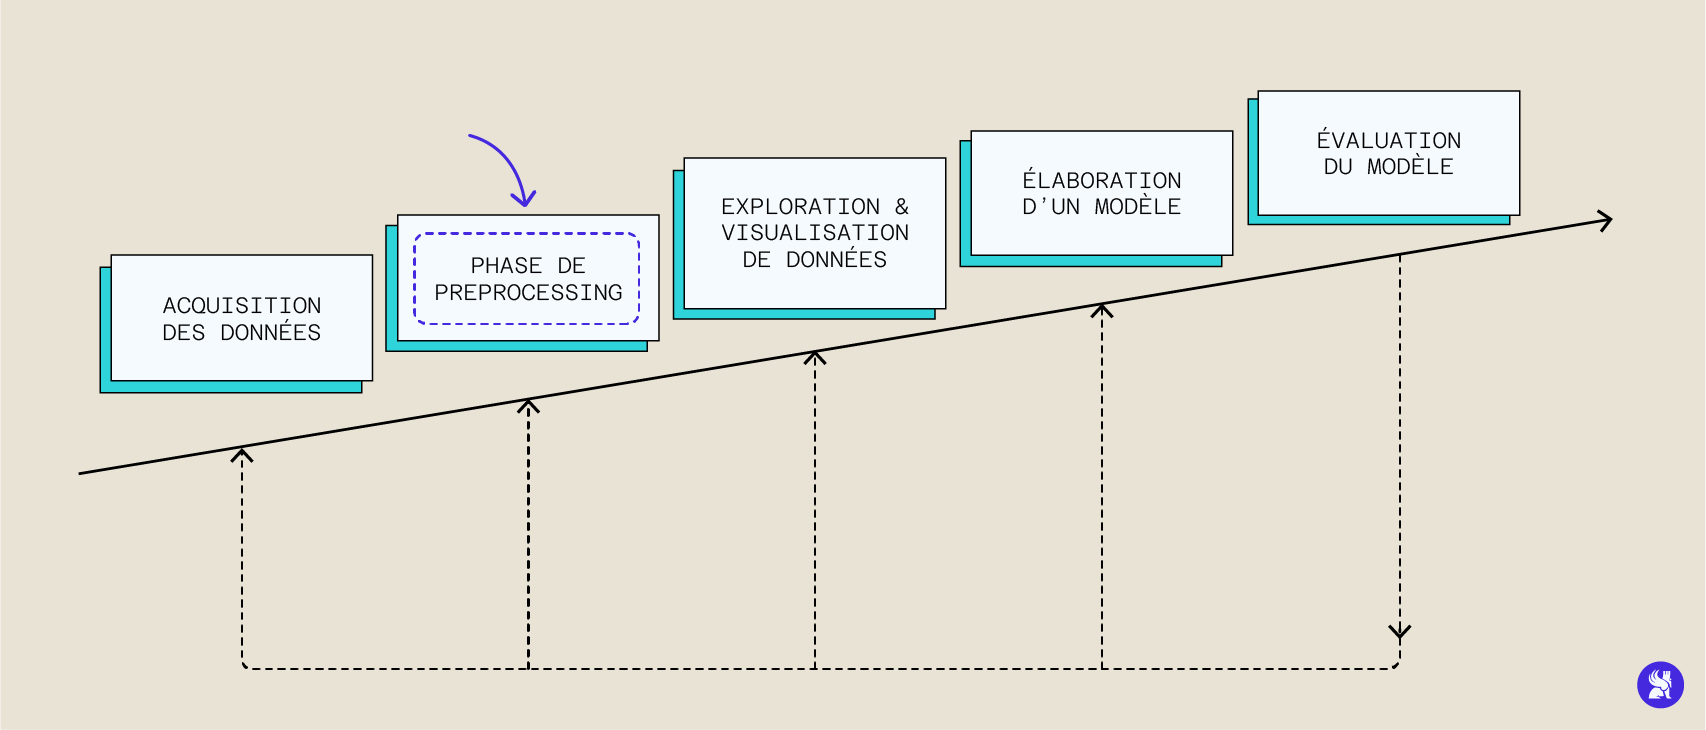

# Packages

In [ ]:
# commande de IPython 
# IPython est un terminal interactif qui apporte des fonctionnalités supplémentaires au langage Python
%matplotlib inline

In [ ]:
# import d'une bonne part des librairies utiles
!pip install pyforest

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pyforest

In [ ]:
# liste des librairies importées
print(lazy_imports(),'/n')

['from sklearn.ensemble import RandomForestClassifier', 'from sklearn.linear_model import LogisticRegression', 'from sklearn.linear_model import RidgeCV', 'import keras', 'import datetime as dt', 'from dask import dataframe as dd', 'import os', 'import altair as alt', 'from sklearn.ensemble import GradientBoostingRegressor', 'import pydot', 'from fbprophet import Prophet', 'import plotly.express as px', 'from sklearn.impute import SimpleImputer', 'from xlrd import open_workbook', 'import xgboost as xgb', 'from sklearn.model_selection import train_test_split', 'from sklearn.preprocessing import PolynomialFeatures', 'import torch', 'import fastai', 'import sklearn', 'import awswrangler as wr', 'from sklearn.preprocessing import StandardScaler', 'from sklearn.cluster import KMeans', 'import skimage', 'from sklearn.model_selection import KFold', 'import seaborn as sns', 'import gensim', 'from pyspark import SparkContext', 'from sklearn.linear_model import Ridge', 'import nltk', 'import cv2

In [ ]:
# Colab inclut une extension qui transforme les dataframes pandas en affichages interactifs qui peuvent être filtrés,
# triés et explorés de manière dynamique
from google.colab import data_table
data_table.enable_dataframe_formatter()  # pour désactiver : df_table.disable_dfframe_formatter()

In [ ]:
# adapter l'affichage des données - le maximum de colonnes est affiché 
pd.set_option('display.max_columns', None)

<IPython.core.display.Javascript object>

# Data import

In [ ]:
link_main = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather_main_2018.csv"
link_opinion = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather_opinion_2018.csv"
data_main = pd.read_csv(link_main)
data_opinion = pd.read_csv(link_opinion)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# sécurisation des manipulations, pérennisation des données : travaillons sur une copie
df_main = data_main.copy()
df_opinion = data_opinion.copy()

# Exploratory data analysis

In [ ]:
df_main.head(1)

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C
0,2018-01-01,12,8,61,9,11,8,8.9,79,9.5,1018,41.75,12,8,7


In [ ]:
df_main.tail(1)

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C
364,2018-12-31,9,5,10,5,9,6,0.0,95,6.0,1038,40.25,10,7,5


In [ ]:
df_opinion.head(1)

,date,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION
0,2018-01-01,113,0,3,5.1,bad


In [ ]:
df_opinion.tail(1)

,date,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION
340,2018-08-16,119,0,1,10.5,very good


In [ ]:
df_main.columns

Index(['DATE', 'MAX_TEMPERATURE_C', 'MIN_TEMPERATURE_C', 'WINDSPEED_MAX_KMH',
       'TEMPERATURE_MORNING_C', 'TEMPERATURE_NOON_C', 'TEMPERATURE_EVENING_C',
       'PRECIP_TOTAL_DAY_MM', 'HUMIDITY_MAX_PERCENT', 'VISIBILITY_AVG_KM',
       'PRESSURE_MAX_MB', 'CLOUDCOVER_AVG_PERCENT', 'HEATINDEX_MAX_C',
       'DEWPOINT_MAX_C', 'WINDTEMP_MAX_C'],
      dtype='object')

In [ ]:
df_opinion.columns

Index(['date', 'WEATHER_CODE_EVENING', 'TOTAL_SNOW_MM', 'UV_INDEX', 'SUNHOUR',
       'OPINION'],
      dtype='object')

In [ ]:
#  lowercase column names
df_opinion.columns = [column.lower() for column in df_opinion.columns]
df_opinion.columns

Index(['date', 'weather_code_evening', 'total_snow_mm', 'uv_index', 'sunhour',
       'opinion'],
      dtype='object')

In [ ]:
#  lowercase column names
df_main.columns = [column.lower() for column in df_main.columns]
df_main.columns

Index(['date', 'max_temperature_c', 'min_temperature_c', 'windspeed_max_kmh',
       'temperature_morning_c', 'temperature_noon_c', 'temperature_evening_c',
       'precip_total_day_mm', 'humidity_max_percent', 'visibility_avg_km',
       'pressure_max_mb', 'cloudcover_avg_percent', 'heatindex_max_c',
       'dewpoint_max_c', 'windtemp_max_c'],
      dtype='object')

In [ ]:
# shapes
print('df_main.shape :', df_main.shape)
print('df_opinion.shape :', df_opinion.shape)

df_main.shape : (365, 15)
df_opinion.shape : (341, 6)


# NaN values ?

In [ ]:
df_main.isna().sum()

date                      0
max_temperature_c         0
min_temperature_c         0
windspeed_max_kmh         0
temperature_morning_c     0
temperature_noon_c        0
temperature_evening_c     0
precip_total_day_mm       0
humidity_max_percent      0
visibility_avg_km         0
pressure_max_mb           0
cloudcover_avg_percent    0
heatindex_max_c           0
dewpoint_max_c            0
windtemp_max_c            0
dtype: int64

In [ ]:
df_opinion.isna().sum()

date                    0
weather_code_evening    0
total_snow_mm           0
uv_index                0
sunhour                 0
opinion                 0
dtype: int64

# Merge
First of all, you have to merge both DataFrames to have a new DataFrame "df2018" DataFrame with 365 rows and 20 columns (indeed, you can drop the date column in double).



In [ ]:
# specific columns of df_opinion
[x for x in df_opinion.columns if x not in  df_main.columns]

['weather_code_evening', 'total_snow_mm', 'uv_index', 'sunhour', 'opinion']

In [ ]:
# specific columns of df_main
[x for x in df_main.columns if x not in  df_opinion.columns]

['max_temperature_c',
 'min_temperature_c',
 'windspeed_max_kmh',
 'temperature_morning_c',
 'temperature_noon_c',
 'temperature_evening_c',
 'precip_total_day_mm',
 'humidity_max_percent',
 'visibility_avg_km',
 'pressure_max_mb',
 'cloudcover_avg_percent',
 'heatindex_max_c',
 'dewpoint_max_c',
 'windtemp_max_c']

COMMON COLUMN FOR THE MERGING !!!

In [ ]:
# Finding Common columns for merging on the right way the twqo dataframes
commun_column = np.intersect1d(df_opinion.columns, df_main.columns)
commun_column

<IPython.core.display.Javascript object>

array(['date'], dtype=object)

MERGING

In [ ]:
# merging 
df2018 = pd.merge(df_main, df_opinion, how = 'outer', on= ['date'])

<IPython.core.display.Javascript object>

In [ ]:
# head
df2018.head(3)

,date,max_temperature_c,min_temperature_c,windspeed_max_kmh,temperature_morning_c,temperature_noon_c,temperature_evening_c,precip_total_day_mm,humidity_max_percent,visibility_avg_km,pressure_max_mb,cloudcover_avg_percent,heatindex_max_c,dewpoint_max_c,windtemp_max_c,weather_code_evening,total_snow_mm,uv_index,sunhour,opinion
0,2018-01-01,12,8,61,9,11,8,8.9,79,9.5,1018,41.750,12,8,7,113.0,0.0,3.0,5.1,bad
1,2018-01-02,13,6,26,8,12,13,0.6,96,9.0,1020,87.875,13,12,6,122.0,0.0,3.0,3.3,bad
2,2018-01-03,15,10,40,11,12,10,5.5,82,8.5,1017,91.500,15,13,7,122.0,0.0,3.0,3.3,bad


In [ ]:
# column df_main not merged 
[x for x in df_main.columns if x not in  df2018.columns]

[]

In [ ]:
# column df_opinion not merged 
[x for x in df_opinion.columns if x not in  df2018.columns]

[]

In [ ]:
# shape merged dataframe
print('df_main.shape :', df_main.shape)
print('df_opinion.shape :', df_opinion.shape)
shape = df2018.shape
print('df2018.shape :', df2018.shape)

df_main.shape : (365, 15)
df_opinion.shape : (341, 6)
df2018.shape : (365, 20)


In [ ]:
# informations sur les données du dataframe
df2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   date                    365 non-null    object 
 1   max_temperature_c       365 non-null    int64  
 2   min_temperature_c       365 non-null    int64  
 3   windspeed_max_kmh       365 non-null    int64  
 4   temperature_morning_c   365 non-null    int64  
 5   temperature_noon_c      365 non-null    int64  
 6   temperature_evening_c   365 non-null    int64  
 7   precip_total_day_mm     365 non-null    float64
 8   humidity_max_percent    365 non-null    int64  
 9   visibility_avg_km       365 non-null    float64
 10  pressure_max_mb         365 non-null    int64  
 11  cloudcover_avg_percent  365 non-null    float64
 12  heatindex_max_c         365 non-null    int64  
 13  dewpoint_max_c          365 non-null    int64  
 14  windtemp_max_c          365 non-null    in

In [ ]:
# NaN values by column 
df2018.isna().sum()

date                       0
max_temperature_c          0
min_temperature_c          0
windspeed_max_kmh          0
temperature_morning_c      0
temperature_noon_c         0
temperature_evening_c      0
precip_total_day_mm        0
humidity_max_percent       0
visibility_avg_km          0
pressure_max_mb            0
cloudcover_avg_percent     0
heatindex_max_c            0
dewpoint_max_c             0
windtemp_max_c             0
weather_code_evening      24
total_snow_mm             24
uv_index                  24
sunhour                   24
opinion                   24
dtype: int64

In [ ]:
print('NaN values =', df2018.isna().sum().sum())

NaN values = 120


In [ ]:
print('len df_main.columns :',len(df_main.columns))
print('len df_opinion.columns :',len(df_opinion.columns))
print('len df2018 :', len(df2018.columns))

len df_main.columns : 15
len df_opinion.columns : 6
len df2018 : 20


In [ ]:
# duplicated values in the "date" column ? 
df2018['date'].is_unique

True

# Linear regresssion
There are some missing values in the "Sunhour" column, and you want to fill them.

First, you have to split the DataFrame to have :
- a DF with only rows without NaN, you'll call it "df_clean". This DF should have 341 rows and 20 columns.
- a DF with only rows with NaN in the Sunhour column (The rows you want to fill), you'll call it "df_nan". This DF should have 24 rows and 20 columns.


In [ ]:
# a DF with only rows without NaN, you'll call it "df_clean". This DF should have 341 rows and 20 columns
df_clean = df2018.dropna()

In [ ]:
# df_clean_shape
df_clean_shape = df_clean.shape
df_clean_shape

(341, 20)

In [ ]:
# a DF with only rows with NaN in the Sunhour column (The rows you want to fill), you'll call it "df_nan". This DF should have 24 rows and 20
df_nan = df2018[df2018['sunhour'].isna()]
df_nan.head()

,date,max_temperature_c,min_temperature_c,windspeed_max_kmh,temperature_morning_c,temperature_noon_c,temperature_evening_c,precip_total_day_mm,humidity_max_percent,visibility_avg_km,pressure_max_mb,cloudcover_avg_percent,heatindex_max_c,dewpoint_max_c,windtemp_max_c,weather_code_evening,total_snow_mm,uv_index,sunhour,opinion
18,2018-01-19,10,6,23,6,10,6,0.7,88,9.875,1020,37.000,10,6,5,NaN,NaN,NaN,NaN,NaN
31,2018-02-01,8,3,17,4,8,4,0.2,81,10.000,1012,39.500,8,3,2,NaN,NaN,NaN,NaN,NaN
66,2018-03-08,13,7,23,7,12,9,0.4,87,9.750,1005,52.625,13,7,6,NaN,NaN,NaN,NaN,NaN
100,2018-04-11,15,7,14,7,15,12,1.2,87,7.875,1002,59.125,15,10,10,NaN,NaN,NaN,NaN,NaN
118,2018-04-29,10,7,23,8,10,8,0.7,93,9.000,1008,85.000,10,9,7,NaN,NaN,NaN,NaN,NaN


In [ ]:
# df_nan_shape
df_nan_shape = df_nan.shape
df_nan_shape

(24, 20)

## Now, train your model
For this part, let's work on df_clean. 
With scikit-learn, find the multivariate linear regression model with the best score (remember to train-test-split your DataFrame "df_clean" before!). 

You are trying to predict `SUNHOUR`, so what's your target `y` ?

Print the R2-score for the test set, and check if you don't have underfitting or overfitting.

In [ ]:
# information about the  data types
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 341 entries, 0 to 364
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   date                    341 non-null    object 
 1   max_temperature_c       341 non-null    int64  
 2   min_temperature_c       341 non-null    int64  
 3   windspeed_max_kmh       341 non-null    int64  
 4   temperature_morning_c   341 non-null    int64  
 5   temperature_noon_c      341 non-null    int64  
 6   temperature_evening_c   341 non-null    int64  
 7   precip_total_day_mm     341 non-null    float64
 8   humidity_max_percent    341 non-null    int64  
 9   visibility_avg_km       341 non-null    float64
 10  pressure_max_mb         341 non-null    int64  
 11  cloudcover_avg_percent  341 non-null    float64
 12  heatindex_max_c         341 non-null    int64  
 13  dewpoint_max_c          341 non-null    int64  
 14  windtemp_max_c          341 non-null    in

### column "date" to datetime

**The linear regression algorithm cannot handle strings or datetime variables**


extract features from it; like: Date, Month , Year. separately

In [ ]:
# datetime type
df_clean['date'] =  pd.to_datetime(df_clean['date'])

<IPython.core.display.Javascript object>

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# date
df_clean['day'] = df_clean['date'].dt.day
df_clean['month'] = df_clean['date'].dt.month
df_clean['year'] = df_clean['date'].dt.year

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [ ]:
df_clean.columns

Index(['date', 'max_temperature_c', 'min_temperature_c', 'windspeed_max_kmh',
       'temperature_morning_c', 'temperature_noon_c', 'temperature_evening_c',
       'precip_total_day_mm', 'humidity_max_percent', 'visibility_avg_km',
       'pressure_max_mb', 'cloudcover_avg_percent', 'heatindex_max_c',
       'dewpoint_max_c', 'windtemp_max_c', 'weather_code_evening',
       'total_snow_mm', 'uv_index', 'sunhour', 'opinion', 'day', 'month',
       'year'],
      dtype='object')

In [ ]:
df_clean.head(1)

,date,max_temperature_c,min_temperature_c,windspeed_max_kmh,temperature_morning_c,temperature_noon_c,temperature_evening_c,precip_total_day_mm,humidity_max_percent,visibility_avg_km,pressure_max_mb,cloudcover_avg_percent,heatindex_max_c,dewpoint_max_c,windtemp_max_c,weather_code_evening,total_snow_mm,uv_index,sunhour,opinion,day,month,year
0,2018-01-01,12,8,61,9,11,8,8.9,79,9.5,1018,41.75,12,8,7,113.0,0.0,3.0,5.1,bad,1,1,2018


In [ ]:
# data types
type_data = df_clean.columns.to_series().groupby(df_clean.dtypes).groups
type_data

{datetime64[ns]: ['date'], int64: ['max_temperature_c', 'min_temperature_c', 'windspeed_max_kmh', 'temperature_morning_c', 'temperature_noon_c', 'temperature_evening_c', 'humidity_max_percent', 'pressure_max_mb', 'heatindex_max_c', 'dewpoint_max_c', 'windtemp_max_c', 'day', 'month', 'year'], float64: ['precip_total_day_mm', 'visibility_avg_km', 'cloudcover_avg_percent', 'weather_code_evening', 'total_snow_mm', 'uv_index', 'sunhour'], object: ['opinion']}

### model

In [ ]:
df_clean.columns

Index(['date', 'max_temperature_c', 'min_temperature_c', 'windspeed_max_kmh',
       'temperature_morning_c', 'temperature_noon_c', 'temperature_evening_c',
       'precip_total_day_mm', 'humidity_max_percent', 'visibility_avg_km',
       'pressure_max_mb', 'cloudcover_avg_percent', 'heatindex_max_c',
       'dewpoint_max_c', 'windtemp_max_c', 'weather_code_evening',
       'total_snow_mm', 'uv_index', 'sunhour', 'opinion', 'day', 'month',
       'year'],
      dtype='object')

In [ ]:
type_data = df_clean.columns.to_series().groupby(df_clean.dtypes).groups
type_data

{datetime64[ns]: ['date'], int64: ['max_temperature_c', 'min_temperature_c', 'windspeed_max_kmh', 'temperature_morning_c', 'temperature_noon_c', 'temperature_evening_c', 'humidity_max_percent', 'pressure_max_mb', 'heatindex_max_c', 'dewpoint_max_c', 'windtemp_max_c', 'day', 'month', 'year'], float64: ['precip_total_day_mm', 'visibility_avg_km', 'cloudcover_avg_percent', 'weather_code_evening', 'total_snow_mm', 'uv_index', 'sunhour'], object: ['opinion']}

In [ ]:
# les variables explicatives 
X = df_clean.drop(['sunhour', 'date', 'opinion'], axis = 1)
X.head(2)

,max_temperature_c,min_temperature_c,windspeed_max_kmh,temperature_morning_c,temperature_noon_c,temperature_evening_c,precip_total_day_mm,humidity_max_percent,visibility_avg_km,pressure_max_mb,cloudcover_avg_percent,heatindex_max_c,dewpoint_max_c,windtemp_max_c,weather_code_evening,total_snow_mm,uv_index,day,month,year
0,12,8,61,9,11,8,8.9,79,9.5,1018,41.750,12,8,7,113.0,0.0,3.0,1,1,2018
1,13,6,26,8,12,13,0.6,96,9.0,1020,87.875,13,12,6,122.0,0.0,3.0,2,1,2018


In [ ]:
# columns of X
X.columns

Index(['max_temperature_c', 'min_temperature_c', 'windspeed_max_kmh',
       'temperature_morning_c', 'temperature_noon_c', 'temperature_evening_c',
       'precip_total_day_mm', 'humidity_max_percent', 'visibility_avg_km',
       'pressure_max_mb', 'cloudcover_avg_percent', 'heatindex_max_c',
       'dewpoint_max_c', 'windtemp_max_c', 'weather_code_evening',
       'total_snow_mm', 'uv_index', 'day', 'month', 'year'],
      dtype='object')

In [ ]:
# data types X
X_data = X.columns.to_series().groupby(X.dtypes).groups
X_data

{int64: ['max_temperature_c', 'min_temperature_c', 'windspeed_max_kmh', 'temperature_morning_c', 'temperature_noon_c', 'temperature_evening_c', 'humidity_max_percent', 'pressure_max_mb', 'heatindex_max_c', 'dewpoint_max_c', 'windtemp_max_c', 'day', 'month', 'year'], float64: ['precip_total_day_mm', 'visibility_avg_km', 'cloudcover_avg_percent', 'weather_code_evening', 'total_snow_mm', 'uv_index']}

In [ ]:
# dependent variable, taget variable 
y = df_clean[['sunhour']]
y.head()

,sunhour
0,5.1
1,3.3
2,3.3
3,3.3
4,6.9


In [ ]:
# type "y"
# data types X
y.dtypes

sunhour    float64
dtype: object

In [ ]:
# Using a random state of 42, creation of a train/test set with a test set ratio of 0.20

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 1, test_size = 0.30 )
print("The shape of the X :", X.shape)
print("The shape of the X_train :", X_train.shape)
print("The shape of the X_test :", X_test.shape)

<IPython.core.display.Javascript object>

The shape of the X : (341, 20)
The shape of the X_train : (238, 20)
The shape of the X_test : (103, 20)


In [ ]:
# linear regression model
reg_model = LinearRegression()
reg_model

<IPython.core.display.Javascript object>

LinearRegression()

In [ ]:
# fitting the model
reg_model.fit (X_train,y_train)

LinearRegression()

## Predictions
Predict the sunhours values for your DF "df_nan", and store result in the `SUNHOUR` column (which is empty, because this is `df_nan`).

In [ ]:
# prediction of the test set 
y_pred = reg_model.predict (X_test)

In [ ]:
# model train score
print("Le score pour le Train set:", reg_model.score(X_train, y_train).round(3))

Le score pour le Train set: 0.768


In [ ]:
# model performance
print("Le score pour le Test dataset (R2) :", reg_model.score(X_test,y_test).round(3))

Le score pour le Test dataset (R2) : 0.742


In [ ]:
# Merging results from model.predict() with original pandas DataFrame
df_clean['prediction_sunhour'] = reg_model.predict(X)
df_clean.head(1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,date,max_temperature_c,min_temperature_c,windspeed_max_kmh,temperature_morning_c,temperature_noon_c,temperature_evening_c,precip_total_day_mm,humidity_max_percent,visibility_avg_km,pressure_max_mb,cloudcover_avg_percent,heatindex_max_c,dewpoint_max_c,windtemp_max_c,weather_code_evening,total_snow_mm,uv_index,sunhour,opinion,day,month,year,prediction_sunhour
0,2018-01-01,12,8,61,9,11,8,8.9,79,9.5,1018,41.75,12,8,7,113.0,0.0,3.0,5.1,bad,1,1,2018,9.20315


## Predictions df_nan

In [ ]:
# NaN values
df_nan.isna().sum()

date                       0
max_temperature_c          0
min_temperature_c          0
windspeed_max_kmh          0
temperature_morning_c      0
temperature_noon_c         0
temperature_evening_c      0
precip_total_day_mm        0
humidity_max_percent       0
visibility_avg_km          0
pressure_max_mb            0
cloudcover_avg_percent     0
heatindex_max_c            0
dewpoint_max_c             0
windtemp_max_c             0
weather_code_evening      24
total_snow_mm             24
uv_index                  24
sunhour                   24
opinion                   24
dtype: int64

In [ ]:
# NaN columns
df_nan.columns[df_nan.isna().any()].tolist()

['weather_code_evening', 'total_snow_mm', 'uv_index', 'sunhour', 'opinion']

In [ ]:
# not NaN columns
list(df_nan.dropna(axis = 1).columns)

['date',
 'max_temperature_c',
 'min_temperature_c',
 'windspeed_max_kmh',
 'temperature_morning_c',
 'temperature_noon_c',
 'temperature_evening_c',
 'precip_total_day_mm',
 'humidity_max_percent',
 'visibility_avg_km',
 'pressure_max_mb',
 'cloudcover_avg_percent',
 'heatindex_max_c',
 'dewpoint_max_c',
 'windtemp_max_c']

In [ ]:
# datetime type
df_nan['date'] =  pd.to_datetime(df_nan['date'])

<IPython.core.display.Javascript object>

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# date
df_nan['day'] = df_nan['date'].dt.day
df_nan['month'] = df_nan['date'].dt.month
df_nan['year'] = df_nan['date'].dt.year

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [ ]:
# data types
type_data = df_nan.columns.to_series().groupby(df_nan.dtypes).groups
type_data

{datetime64[ns]: ['date'], int64: ['max_temperature_c', 'min_temperature_c', 'windspeed_max_kmh', 'temperature_morning_c', 'temperature_noon_c', 'temperature_evening_c', 'humidity_max_percent', 'pressure_max_mb', 'heatindex_max_c', 'dewpoint_max_c', 'windtemp_max_c', 'day', 'month', 'year'], float64: ['precip_total_day_mm', 'visibility_avg_km', 'cloudcover_avg_percent', 'weather_code_evening', 'total_snow_mm', 'uv_index', 'sunhour'], object: ['opinion']}

In [ ]:
df_nan.columns

Index(['date', 'max_temperature_c', 'min_temperature_c', 'windspeed_max_kmh',
       'temperature_morning_c', 'temperature_noon_c', 'temperature_evening_c',
       'precip_total_day_mm', 'humidity_max_percent', 'visibility_avg_km',
       'pressure_max_mb', 'cloudcover_avg_percent', 'heatindex_max_c',
       'dewpoint_max_c', 'windtemp_max_c', 'weather_code_evening',
       'total_snow_mm', 'uv_index', 'sunhour', 'opinion', 'day', 'month',
       'year'],
      dtype='object')

In [ ]:
df_nan = df_nan.fillna(df_clean.median())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [ ]:
df_nan.head()

,date,max_temperature_c,min_temperature_c,windspeed_max_kmh,temperature_morning_c,temperature_noon_c,temperature_evening_c,precip_total_day_mm,humidity_max_percent,visibility_avg_km,pressure_max_mb,cloudcover_avg_percent,heatindex_max_c,dewpoint_max_c,windtemp_max_c,weather_code_evening,total_snow_mm,uv_index,sunhour,opinion,day,month,year
18,2018-01-19,10,6,23,6,10,6,0.7,88,9.875,1020,37.000,10,6,5,116.0,0.0,1.0,10.2,NaN,19,1,2018
31,2018-02-01,8,3,17,4,8,4,0.2,81,10.000,1012,39.500,8,3,2,116.0,0.0,1.0,10.2,NaN,1,2,2018
66,2018-03-08,13,7,23,7,12,9,0.4,87,9.750,1005,52.625,13,7,6,116.0,0.0,1.0,10.2,NaN,8,3,2018
100,2018-04-11,15,7,14,7,15,12,1.2,87,7.875,1002,59.125,15,10,10,116.0,0.0,1.0,10.2,NaN,11,4,2018
118,2018-04-29,10,7,23,8,10,8,0.7,93,9.000,1008,85.000,10,9,7,116.0,0.0,1.0,10.2,NaN,29,4,2018


In [ ]:
X_nan = df_nan.drop(['sunhour','opinion', 'date'], axis = 1)
X_nan.head(2)

,max_temperature_c,min_temperature_c,windspeed_max_kmh,temperature_morning_c,temperature_noon_c,temperature_evening_c,precip_total_day_mm,humidity_max_percent,visibility_avg_km,pressure_max_mb,cloudcover_avg_percent,heatindex_max_c,dewpoint_max_c,windtemp_max_c,weather_code_evening,total_snow_mm,uv_index,day,month,year
18,10,6,23,6,10,6,0.7,88,9.875,1020,37.0,10,6,5,116.0,0.0,1.0,19,1,2018
31,8,3,17,4,8,4,0.2,81,10.000,1012,39.5,8,3,2,116.0,0.0,1.0,1,2,2018


In [ ]:
# prediction of df-nan_sunhour
df_nan['sunhour']= reg_model.predict(X_nan)

In [ ]:
df_nan.head()

,date,max_temperature_c,min_temperature_c,windspeed_max_kmh,temperature_morning_c,temperature_noon_c,temperature_evening_c,precip_total_day_mm,humidity_max_percent,visibility_avg_km,pressure_max_mb,cloudcover_avg_percent,heatindex_max_c,dewpoint_max_c,windtemp_max_c,weather_code_evening,total_snow_mm,uv_index,sunhour,opinion,day,month,year
18,2018-01-19,10,6,23,6,10,6,0.7,88,9.875,1020,37.000,10,6,5,116.0,0.0,1.0,8.973329,NaN,19,1,2018
31,2018-02-01,8,3,17,4,8,4,0.2,81,10.000,1012,39.500,8,3,2,116.0,0.0,1.0,8.849051,NaN,1,2,2018
66,2018-03-08,13,7,23,7,12,9,0.4,87,9.750,1005,52.625,13,7,6,116.0,0.0,1.0,8.064313,NaN,8,3,2018
100,2018-04-11,15,7,14,7,15,12,1.2,87,7.875,1002,59.125,15,10,10,116.0,0.0,1.0,9.526520,NaN,11,4,2018
118,2018-04-29,10,7,23,8,10,8,0.7,93,9.000,1008,85.000,10,9,7,116.0,0.0,1.0,6.534684,NaN,29,4,2018


# Concatenate and scatterplot

Concatenate both DataFrames to a new one "df2018complete", and draw a scatterplot with Date on X-axis and Sunhours on Y-axis.
Try to add a flag to identify real values and predicted values. 

You should get something like that. Of course, not exactly the same chart, because we don't train the same model, on the same columns, etc...

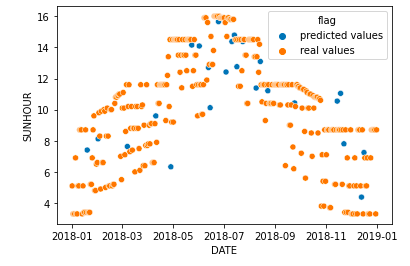

In [ ]:
# Your code here
df2018complete = pd.concat([df_clean, df_nan])
df2018complete.head()

<IPython.core.display.Javascript object>

,date,max_temperature_c,min_temperature_c,windspeed_max_kmh,temperature_morning_c,temperature_noon_c,temperature_evening_c,precip_total_day_mm,humidity_max_percent,visibility_avg_km,pressure_max_mb,cloudcover_avg_percent,heatindex_max_c,dewpoint_max_c,windtemp_max_c,weather_code_evening,total_snow_mm,uv_index,sunhour,opinion,day,month,year,prediction_sunhour
0,2018-01-01,12,8,61,9,11,8,8.9,79,9.500,1018,41.750,12,8,7,113.0,0.0,3.0,5.1,bad,1,1,2018,9.203150
1,2018-01-02,13,6,26,8,12,13,0.6,96,9.000,1020,87.875,13,12,6,122.0,0.0,3.0,3.3,bad,2,1,2018,6.839629
2,2018-01-03,15,10,40,11,12,10,5.5,82,8.500,1017,91.500,15,13,7,122.0,0.0,3.0,3.3,bad,3,1,2018,5.005376
3,2018-01-04,14,11,45,14,14,11,0.0,89,10.000,1011,90.125,14,12,10,116.0,0.0,3.0,3.3,bad,4,1,2018,6.416833
4,2018-01-05,12,7,21,10,11,8,1.5,85,9.875,1005,62.375,12,10,7,116.0,0.0,3.0,6.9,bad,5,1,2018,8.836789


In [ ]:
# shape
df2018complete.shape

(365, 24)

In [ ]:
# information about the dataframe 
df2018complete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 349
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    365 non-null    datetime64[ns]
 1   max_temperature_c       365 non-null    int64         
 2   min_temperature_c       365 non-null    int64         
 3   windspeed_max_kmh       365 non-null    int64         
 4   temperature_morning_c   365 non-null    int64         
 5   temperature_noon_c      365 non-null    int64         
 6   temperature_evening_c   365 non-null    int64         
 7   precip_total_day_mm     365 non-null    float64       
 8   humidity_max_percent    365 non-null    int64         
 9   visibility_avg_km       365 non-null    float64       
 10  pressure_max_mb         365 non-null    int64         
 11  cloudcover_avg_percent  365 non-null    float64       
 12  heatindex_max_c         365 non-null    int64     

In [ ]:
# columns
df2018complete.columns

Index(['date', 'max_temperature_c', 'min_temperature_c', 'windspeed_max_kmh',
       'temperature_morning_c', 'temperature_noon_c', 'temperature_evening_c',
       'precip_total_day_mm', 'humidity_max_percent', 'visibility_avg_km',
       'pressure_max_mb', 'cloudcover_avg_percent', 'heatindex_max_c',
       'dewpoint_max_c', 'windtemp_max_c', 'weather_code_evening',
       'total_snow_mm', 'uv_index', 'sunhour', 'opinion', 'day', 'month',
       'year', 'prediction_sunhour'],
      dtype='object')

In [ ]:
# drop 
df2018complete = df2018complete.drop (['prediction_sunhour'], axis = 1)
df2018complete.columns

Index(['date', 'max_temperature_c', 'min_temperature_c', 'windspeed_max_kmh',
       'temperature_morning_c', 'temperature_noon_c', 'temperature_evening_c',
       'precip_total_day_mm', 'humidity_max_percent', 'visibility_avg_km',
       'pressure_max_mb', 'cloudcover_avg_percent', 'heatindex_max_c',
       'dewpoint_max_c', 'windtemp_max_c', 'weather_code_evening',
       'total_snow_mm', 'uv_index', 'sunhour', 'opinion', 'day', 'month',
       'year'],
      dtype='object')

In [ ]:
# NaN columns
df2018complete.columns[df2018complete.isna().any()].tolist()

['opinion']

In [ ]:
# "opinion" column
df2018complete['opinion'].value_counts(dropna = False)

good                91
very bad            82
bad                 79
not good not bad    68
NaN                 24
very good           21
Name: opinion, dtype: int64

In [ ]:
# create a column for identify real and predicted values. The column "opinion" contains NaN
df2018complete['values_origin']= np.where(df2018complete.opinion.notnull(), 'real_values', 'predicted_values')

<IPython.core.display.Javascript object>

In [ ]:
# values_origin column
df2018complete['values_origin'].value_counts()

real_values         341
predicted_values     24
Name: values_origin, dtype: int64

In [ ]:
# data types
type_data = df2018complete.columns.to_series().groupby(df2018complete.dtypes).groups
type_data

{datetime64[ns]: ['date'], int64: ['max_temperature_c', 'min_temperature_c', 'windspeed_max_kmh', 'temperature_morning_c', 'temperature_noon_c', 'temperature_evening_c', 'humidity_max_percent', 'pressure_max_mb', 'heatindex_max_c', 'dewpoint_max_c', 'windtemp_max_c', 'day', 'month', 'year'], float64: ['precip_total_day_mm', 'visibility_avg_km', 'cloudcover_avg_percent', 'weather_code_evening', 'total_snow_mm', 'uv_index', 'sunhour'], object: ['opinion', 'values_origin']}

In [ ]:
# independent variables
X = df2018complete.drop(['sunhour', 'date', 'opinion','values_origin'], axis = 1)
X.head(2)

,max_temperature_c,min_temperature_c,windspeed_max_kmh,temperature_morning_c,temperature_noon_c,temperature_evening_c,precip_total_day_mm,humidity_max_percent,visibility_avg_km,pressure_max_mb,cloudcover_avg_percent,heatindex_max_c,dewpoint_max_c,windtemp_max_c,weather_code_evening,total_snow_mm,uv_index,day,month,year
0,12,8,61,9,11,8,8.9,79,9.5,1018,41.750,12,8,7,113.0,0.0,3.0,1,1,2018
1,13,6,26,8,12,13,0.6,96,9.0,1020,87.875,13,12,6,122.0,0.0,3.0,2,1,2018


In [ ]:
# prediction of sunhour
df2018complete['sunhour_predicted']= reg_model.predict(X).round()
df2018complete['sunhour_diff_real_predicted'] = (df2018complete['sunhour_predicted']- df2018complete['sunhour']).round()

In [ ]:
# real values , predicted values, gap between real and predicted
df2018complete[['sunhour','sunhour_predicted', 'sunhour_diff_real_predicted']]

,sunhour,sunhour_predicted,sunhour_diff_real_predicted
0,5.100000,9.0,4.0
1,3.300000,7.0,4.0
2,3.300000,5.0,2.0
3,3.300000,6.0,3.0
4,6.900000,9.0,2.0
...,...,...,...
317,9.595117,10.0,0.0
321,10.140540,10.0,-0.0
325,6.177836,6.0,-0.0
346,3.072037,3.0,-0.0


real values / predicted values / gap

In [ ]:
# import graph_objects from plotly package
import plotly.graph_objects as go
 # import make_subplots function from plotly.subplots
# to make grid of plots
from plotly.subplots import make_subplots

# use specs parameter in make_subplots function
# to create secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])
 
# plot a bar chart by specifying the x and y values
# Use add_trace function to specify secondary_y axes.
fig.add_trace(
    go.Bar(x = df2018complete['date'], y = df2018complete['sunhour'],  name="real_values"),
    secondary_y=False)
 
# Use add_trace function and specify secondary_y axes = True.
fig.add_trace(
    go.Bar(x = df2018complete['date'], y = df2018complete['sunhour_predicted'], name="predicted_values"),
    secondary_y=True,)
 
# Adding title text to the figure
fig.update_layout(
    title_text="   SUNHOUR : real values, predicted values"
)

# Naming x-axis
fig.update_xaxes(title_text="DATE")

**scatterplot for Sunhour prediction in 2018**

In [ ]:
# scatterplot for Sunhour prediction in 2018
fig = px.scatter(df2018complete, x="date", y="sunhour", color="values_origin", title ='Sunhour prediction for 2018')
fig.update_layout(xaxis=dict(tickformat="%m-%Y"))
fig.show()

<IPython.core.display.Javascript object>